<a href="https://colab.research.google.com/github/ZahraShahlaie/Graph-Spectral-Clustering-and-Partial-Differential-Equations/blob/main/heat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gif

In [ ]:
import gif  # Import the 'gif' library


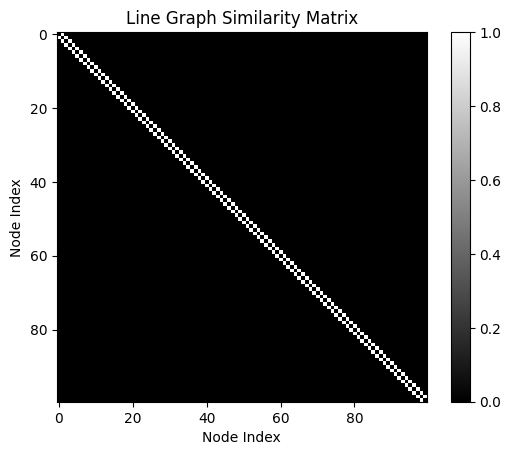

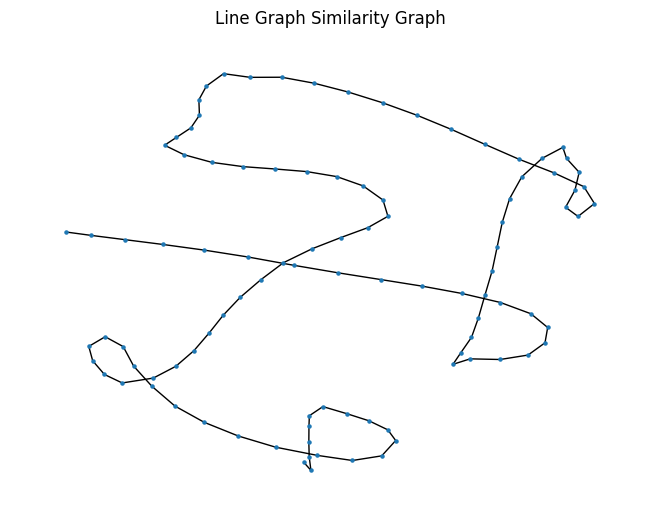

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# parameters
n = 100
dx = 1/n
dt = 0.01 * (1/2) * (dx**2) # Using CFL Conditions
T_max = 100000

line_graph_similarity = np.diag(np.ones(n-1), k=1) + np.diag(np.ones(n-1), k=-1)


# Plotting the graph
plt.imshow(line_graph_similarity, cmap='gray', interpolation='none')
plt.title('Line Graph Similarity Matrix')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.colorbar()
plt.show()

# Create a graph from the similarity matrix
G = nx.Graph()
G.add_edges_from(np.argwhere(line_graph_similarity == 1))

# Plotting the graph
pos = nx.spring_layout(G)  # You can try other layout options
nx.draw(G, pos, with_labels=False, node_size=5)
plt.title('Line Graph Similarity Graph')
plt.show()

h = int(np.floor(n/2))
bad_edge_weight = 0
#line_graph_similarity[h, h+1] = bad_edge_weight
#line_graph_similarity[h+1, h] = bad_edge_weight
line_graph_similarity[0, -1] = bad_edge_weight
line_graph_similarity[-1, 0] = bad_edge_weight


# Define degree_matrix
deg = np.diag(np.sum(line_graph_similarity, axis=1))

# Define laplacian_matrix

laplacian =  deg - line_graph_similarity

print(laplacian)



In [ ]:
line_graph_similarity

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
evolution = np.zeros((n, T_max))

evolution[:, 0] = np.random.uniform(size=(n,)) + np.sin(0.05 * np.arange(n))

for i in range(1, T_max):
    evolution[:, i:i+1] = evolution[:, i-1:i] - (dt / (dx)**2) * laplacian @ evolution[:, i-1:i]

In [ ]:
b = 2
for i in np.logspace(np.log10(1)/np.log10(b), np.log10(T_max)/np.log10(b), base=b):
  print(i)

1.0
1.264855216855296
1.599858719606058
2.023589647725157
2.5595479226995357
3.2374575428176438
4.094915062380425
5.179474679231211
6.5512855685955085
8.286427728546844
10.481131341546856
13.257113655901088
16.76832936811008
21.2095088792019
26.826957952797255
33.93221771895329
42.919342601287774
54.286754393238574
68.66488450042999
86.85113737513527
109.8541141987558
138.9495494373137
175.75106248547914
222.29964825261948
281.17686979742297
355.64803062231266
449.84326689694416
568.9866029018297
719.6856730011518
910.2981779915212
1151.3953993264477
1456.3484775012437
1842.0699693267154
2329.9518105153707
2947.051702551808
3727.5937203149397
4714.866363457391
5963.623316594639
7543.120063354619
9540.954763499938
12067.92640639328
15264.179671752323
19306.97728883248
24420.530945486506
30888.435964774795
39069.39937054614
49417.13361323835
62505.519252739716
79060.43210907695
100000.00000000003


In [ ]:
def plot_evec(i):
    sig = evolution[:, i] - np.mean(evolution[:, i])
    sig /= - np.linalg.norm(sig)
    plt.plot(sig)
    plt.title("Centered Heat Diffusion on Disconnected Line Graph")
    plt.xlabel("Node")
    plt.ylabel("Heat")
    plt.ylim((-0.5, 0.5))

In [ ]:
sig_avg = evolution[:, 99999] - np.mean(evolution[:, 99999])
sig_avg /= np.linalg.norm(sig_avg)

In [ ]:
sig_avg

array([ 0.11606635,  0.11602474,  0.11594126,  0.11581534,  0.11564619,
        0.11543272,  0.1151736 ,  0.11486724,  0.11451183,  0.11410532,
        0.11364545,  0.11312977,  0.11255563,  0.11192024,  0.11122064,
        0.11045376,  0.10961641,  0.10870533,  0.10771717,  0.10664857,
        0.10549614,  0.10425648,  0.10292624,  0.10150211,  0.09998087,
        0.09835939,  0.09663465,  0.09480381,  0.09286417,  0.09081323,
        0.08864871,  0.08636854,  0.08397092,  0.08145432,  0.07881749,
        0.07605948,  0.07317966,  0.07017775,  0.06705377,  0.06380815,
        0.06044163,  0.05695536,  0.05335084,  0.04962997,  0.04579502,
        0.04184865,  0.0377939 ,  0.03363422,  0.0293734 ,  0.02501562,
        0.02056544,  0.01602777,  0.01140786,  0.00671131,  0.00194406,
       -0.00288766, -0.0077773 , -0.01271805, -0.01770281, -0.02272424,
       -0.02777478, -0.03284663, -0.03793183, -0.04302223, -0.04810955,
       -0.05318536, -0.05824116, -0.06326832, -0.06825821, -0.07

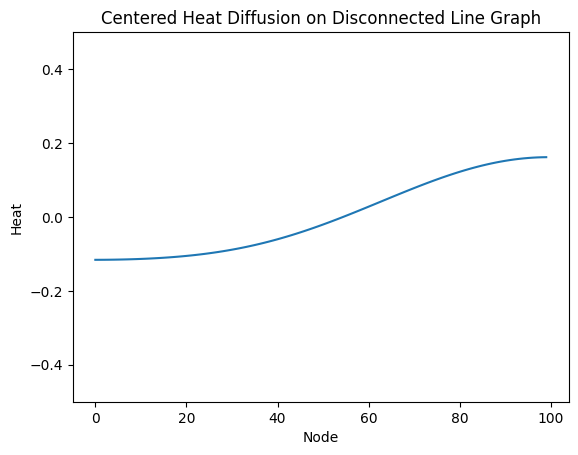

In [ ]:
plot_evec(99999)

In [ ]:
def plot_time(i):
    sig = evolution[:, i]
    sig /= np.linalg.norm(sig)
    plt.plot(sig)
    plt.title("Heat Diffusion on Line Graph")
    plt.xlabel("Node")
    plt.ylabel("Heat")
    plt.ylim((-1, 2))

In [ ]:
sig_norm_u = evolution[:, 99999]
sig_norm_u /= np.linalg.norm(sig_norm_u)

In [ ]:
sig_norm_u

array([0.14275915, 0.14273964, 0.14270048, 0.14264142, 0.14256207,
       0.14246194, 0.14234039, 0.14219669, 0.14202998, 0.1418393 ,
       0.14162359, 0.1413817 , 0.14111239, 0.14081435, 0.14048619,
       0.14012647, 0.1397337 , 0.13930634, 0.13884283, 0.13834159,
       0.13780102, 0.13721953, 0.13659556, 0.13592755, 0.13521399,
       0.1344534 , 0.13364439, 0.1327856 , 0.13187578, 0.13091375,
       0.12989844, 0.12882889, 0.12770425, 0.12652379, 0.12528694,
       0.12399325, 0.12264242, 0.12123432, 0.11976897, 0.11824656,
       0.11666743, 0.11503214, 0.11334138, 0.11159604, 0.10979719,
       0.10794608, 0.10604413, 0.10409296, 0.10209435, 0.10005026,
       0.09796283, 0.09583435, 0.09366731, 0.09146431, 0.08922815,
       0.08696175, 0.08466818, 0.08235064, 0.08001245, 0.07765706,
       0.07528803, 0.07290899, 0.07052369, 0.06813595, 0.06574965,
       0.06336876, 0.06099725, 0.05863917, 0.05629858, 0.05397956,
       0.0516862 , 0.04942257, 0.04719273, 0.04500073, 0.04285

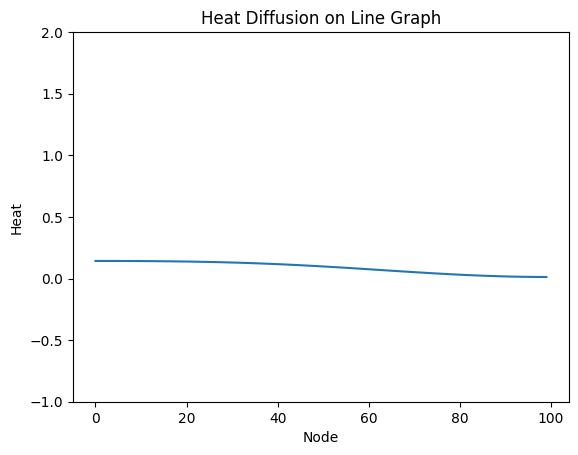

In [ ]:
plot_time(99999)

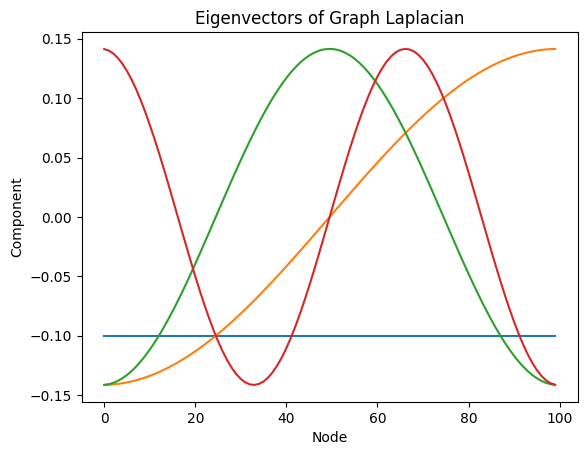

In [ ]:
evals, evecs = np.linalg.eigh(laplacian)
plt.title("Eigenvectors of Graph Laplacian")
plt.xlabel("Node")
plt.ylabel("Component")
plt.plot(evecs[:, :4])
plt.show()

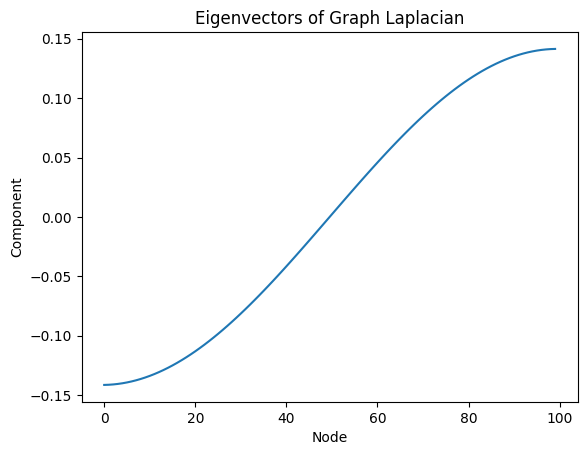

In [ ]:
evals, evecs = np.linalg.eigh(laplacian)
plt.title("Eigenvectors of Graph Laplacian")
plt.xlabel("Node")
plt.ylabel("Component")
plt.plot(evecs[:,1])
plt.show()

In [ ]:


@gif.frame
def plot_evec(i):
    sig = evolution[:, i] - np.mean(evolution[:, i])
    sig /= np.linalg.norm(sig)
    plt.plot(sig)
    plt.title("Centered Heat Diffusion on Disconnected Line Graph")
    plt.xlabel("Node")
    plt.ylabel("Heat")
    plt.ylim((-0.5, 0.5))
@gif.frame
def plot_time(i):
    sig = evolution[:, i]
    sig /= np.linalg.norm(sig)
    plt.plot(sig)
    plt.title("Heat Diffusion on Line Graph")
    plt.xlabel("Node")
    plt.ylabel("Heat")
    plt.ylim((-1, 2))
frames_noscale = []

b = 2
for i in np.logspace(np.log10(1)/np.log10(b), np.log10(T_max)/np.log10(b), base=b):
    if(i < T_max):
        frames_noscale.append(plot_time(int(i)))
gif.save(frames_noscale, "Diffusion_L_0.001_c.gif", duration=100)



In [ ]:
@gif.frame
def superplot(i, num_evecs, evolution, true_evecs, cumulative_energies):
    r, c = 3, num_evecs
    n, T = evolution.shape
    evolution_of_evecs = true_evecs.T @ evolution
    fig, ax = plt.subplots(r, c)
    for j in range(c):
        ax[0, j].plot(true_evecs[:, j])
        ax[0, j].set_ylim((-0.5, 0.5))
        ax[0, j].set_title("$\\vec{\\lambda}_"+str(j)+"$")
        high_freqs = - true_evecs[:, j:] @ evolution_of_evecs[j:, i:i+1]
        high_freqs = high_freqs / np.linalg.norm(high_freqs)
        ax[1, j].set_ylim((-0.5, 0.5))
        ax[1, j].plot(high_freqs)
        ax[1, j].set_title(f"Frequencies above {j}")
        energy = cumulative_energies[j, :i]
        ax[2, j].plot(energy)
        ax[2, j].set_xscale("log", base=2)
        ax[2, j].set_xlim((1, T))
        ax[2, j].set_ylim((0, 50))
    fig.set_size_inches(15, 7)
    plt.tight_layout()


_, true_evecs = np.linalg.eigh(laplacian)
evolution_of_evecs = true_evecs.T @ evolution
cumulative_energies = np.cumsum((evolution_of_evecs[::-1, :])**2, axis=0)[::-1, :]

frames = []
b = 2
frame_idxs = np.sort( np.concatenate( (np.logspace(np.log10(1)/np.log10(b), np.log10(T_max)/np.log10(b), base=b), T_max - np.arange(20))))

for i in frame_idxs:
    if(i < T_max):
        frames.append(superplot(int(i), 6, evolution, true_evecs, cumulative_energies))


<ipython-input-20-0732fc1537e3>:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2, j].set_xscale("log", base=2)


In [ ]:
gif.save(frames, "Eigenvector_Evolution.gif", duration=100)